In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
from scripts import plot as plt_util


import gym
import numpy as np
import os.path as osp
import time

from image
from gym.wrappers import Monitor
from recovery_rl.env import wrappers
from safe_rl.utils.load_utils import load_policy

In [2]:
load_dir = './data/2020-04-23_cpo-maze/2020-04-23_16-46-10-cpo-maze_s0/'
data = plt_util.get_all_datasets([load_dir])

Plotting from...

./data/2020-04-23_cpo-maze/2020-04-23_16-46-10-cpo-maze_s0/



/scr1/.pyenv/versions/safegym/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


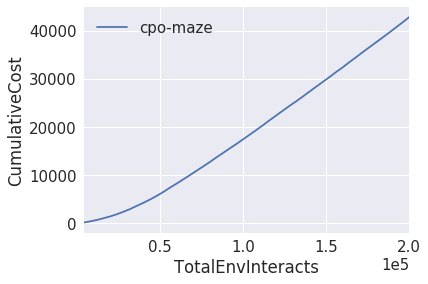

In [32]:
plt_util.plot_data(data[0], savedir='', title='', xaxis='TotalEnvInteracts', value='CumulativeCost')

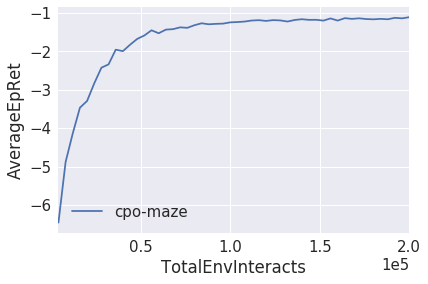

In [33]:
plt_util.plot_data(data, savedir='', title='', xaxis='TotalEnvInteracts')

In [17]:
def run_policy(env, get_action, num_episodes=100, render=False):

    assert env is not None, \
        "Environment not found!\n\n It looks like the environment wasn't saved, " + \
        "and we can't run the agent in it. :("

    o, r, d, ep_ret, ep_cost, ep_len, n = env.reset(), 0, False, 0, 0, 0, 0
    episodes, states = [], [o]
    while n < num_episodes:
        if render:
            env.render()
            time.sleep(1e-3)

        a = get_action(o)
        a = np.clip(a, env.action_space.low, env.action_space.high)
        o, r, d, info = env.step(a)
        ep_ret += r
        ep_cost += info.get('cost', 0)
        ep_len += 1
        states.append(o)
        if d:
            o, r, d, ep_ret, ep_cost, ep_len = env.reset(), 0, False, 0, 0, 0
            episodes.append(states)
            states = [o]
            n += 1
            
    return episodes

In [22]:
env, get_action, sess = load_policy(load_dir, 'last', True)
vid_path = osp.join(load_dir, 'videos')
env = Monitor(env, vid_path, force=True)

INFO:tensorflow:Restoring parameters from ./data/2020-04-23_cpo-maze/2020-04-23_16-46-10-cpo-maze_s0/simple_save/variables/variables


INFO:tensorflow:Restoring parameters from ./data/2020-04-23_cpo-maze/2020-04-23_16-46-10-cpo-maze_s0/simple_save/variables/variables


Using default action op.


/scr1/.pyenv/versions/safegym/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/scr1/.pyenv/versions/safegym/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Trying to monitor an environment which has no 'spec' set. This usually means you did not create it via 'gym.make', and is recommended only for advanced users.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


aaa 3 [-0.13738339 -0.26087891] 201433


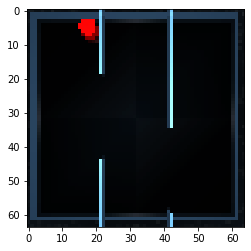

aaa 3 [-0.13000538 -0.27064519] 200422


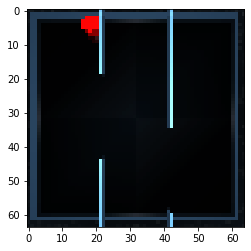

aaa 3 [-0.15851485 -0.16655928] 202118


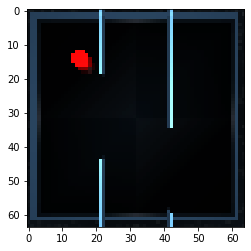

aaa 3 [-0.1338471  -0.19122703] 201429


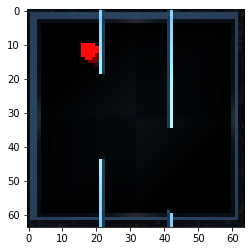

aaa 3 [-0.15882393  0.20138351] 201726


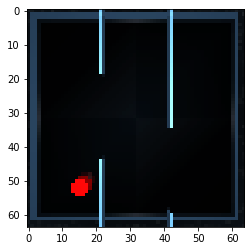

aaa 3 [-0.13415618  0.22605126] 201466


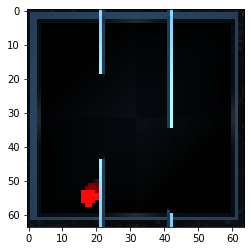

aaa 3 [-0.25943707  0.14052993] 201618


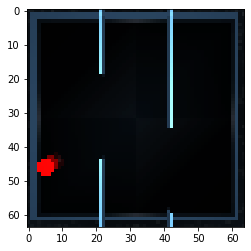

aaa 3 [-0.27499158  0.15728696] 200566


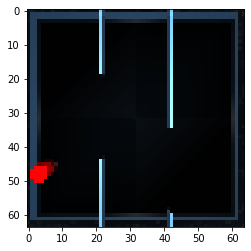

In [23]:
num_episodes = 4
episodes = run_policy(env, get_action, num_episodes, render=True)

In [24]:
env.close()